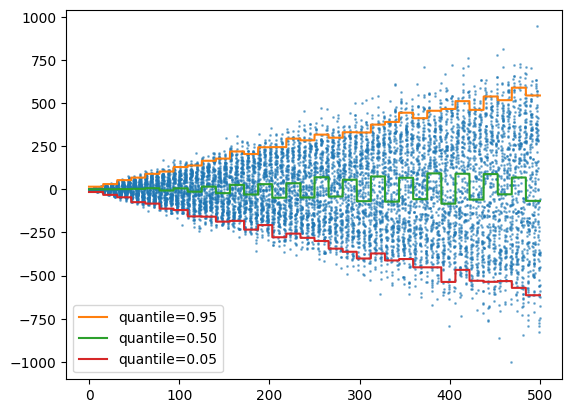

In [12]:
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Simple regression function for X * cos(X)
rng = np.random.RandomState(500)
X_1d = np.linspace(0, 500, num=10000)
X = X_1d.reshape(-1, 1)
y = X_1d * np.cos(X_1d) + rng.normal(scale=X_1d / 3)

quantiles = [0.95, 0.5, 0.05]
parameters = dict(loss="quantile", max_bins=32, max_iter=50)
hist_quantiles = {
    f"quantile={quantile:.2f}": HistGradientBoostingRegressor(
        **parameters, quantile=quantile
    ).fit(X, y)
    for quantile in quantiles
}

fig, ax = plt.subplots()
ax.plot(X_1d, y, "o", alpha=0.5, markersize=1)
for quantile, hist in hist_quantiles.items():
    ax.plot(X_1d, hist.predict(X), label=quantile)
_ = ax.legend(loc="lower left")